In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# algorithm

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
# training
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

%matplotlib inline
     

In [47]:
test = pd.read_csv('F://kaggle//housing//test.csv')
train = pd.read_csv('F://kaggle//housing//train.csv')

In [48]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [49]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

F:\Programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


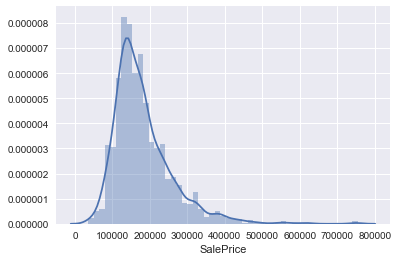

In [50]:
sns.distplot(train['SalePrice'])

F:\Programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


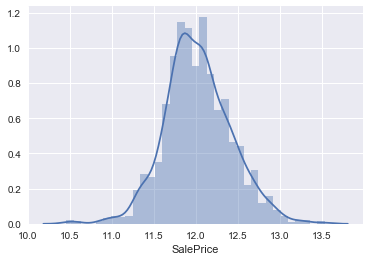

In [51]:
sns.distplot(np.log(train['SalePrice']))

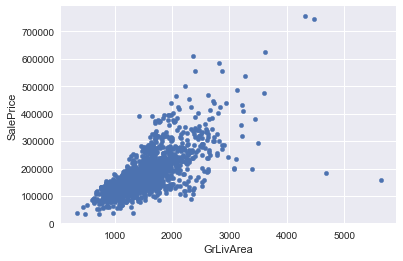

In [52]:
var = 'GrLivArea'
train.plot.scatter(x = var, y = 'SalePrice')

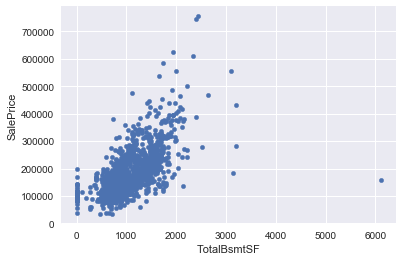

In [53]:
var = 'TotalBsmtSF'
train.plot.scatter(x = var, y = 'SalePrice')

F:\Programs\Anaconda\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


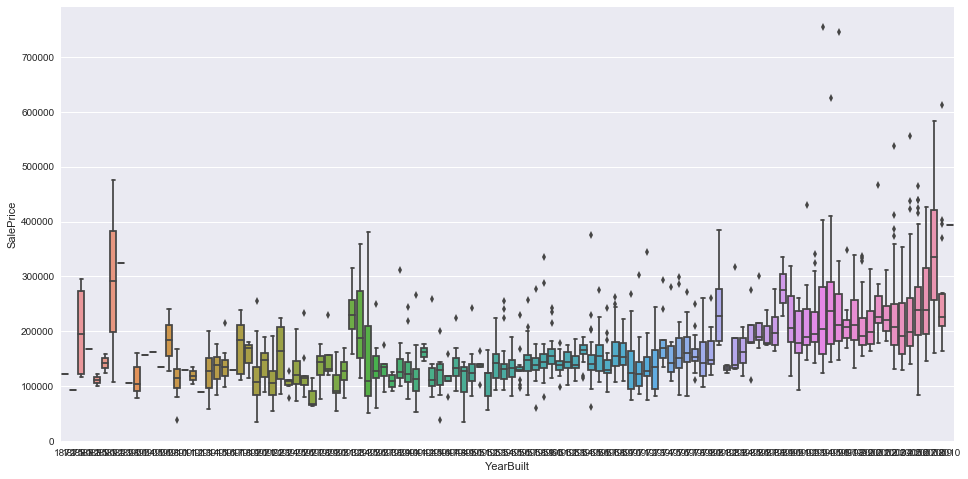

In [54]:
f, ax = plt.subplots(figsize = (16,8))
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = train)

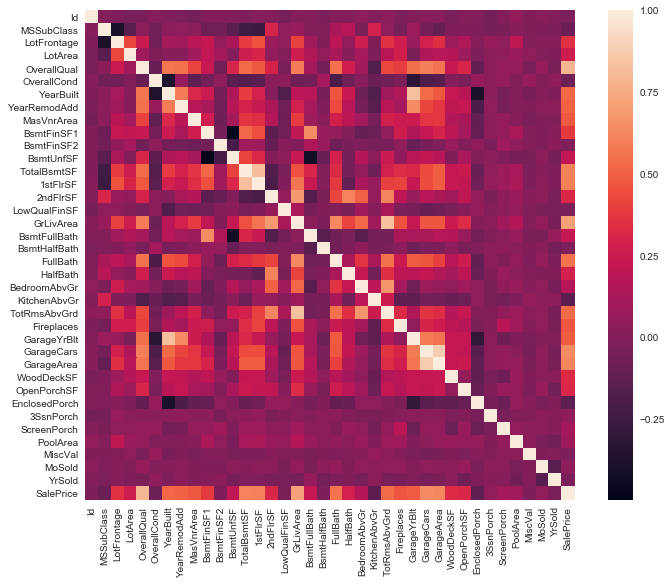

In [55]:
corrmat = train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, square = True)

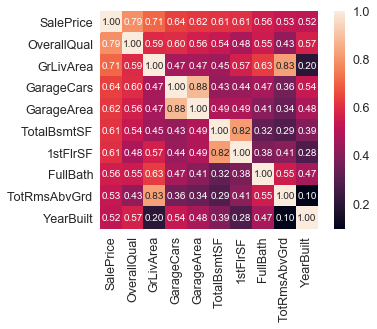

In [56]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size':10},
                 yticklabels = cols.values, xticklabels=cols.values)


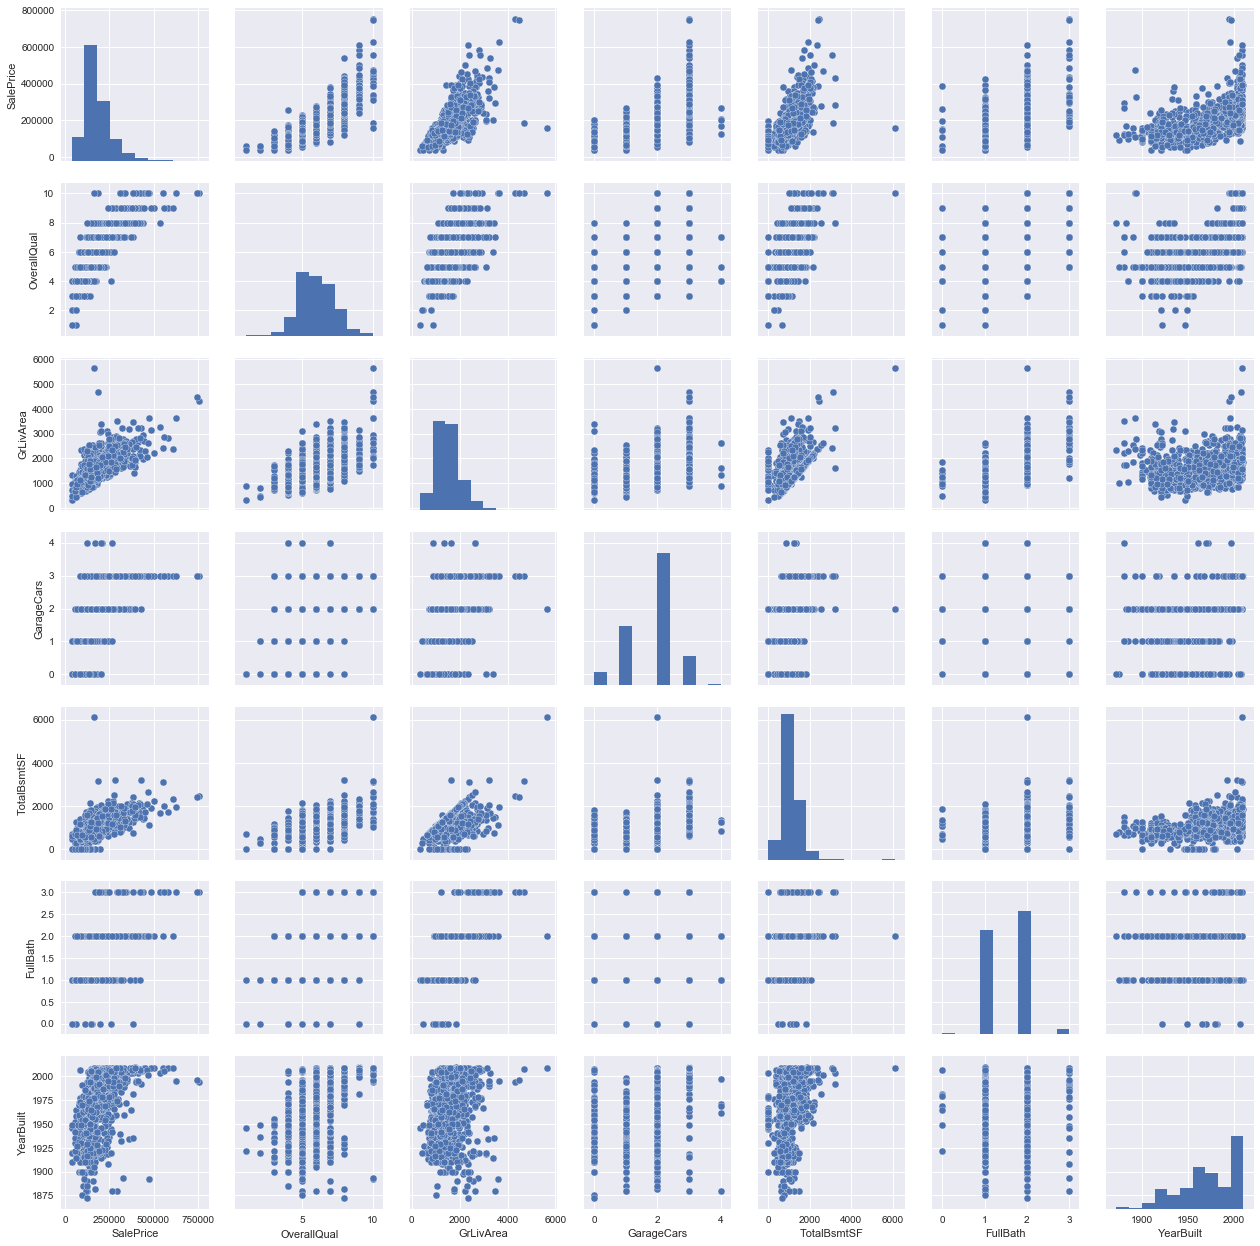

In [57]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sns.pairplot(train[cols],size = 2.5)

In [58]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1, keys = ['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [59]:
# log transforms
#     adding HasBsmt
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index = train.index)
train['HasBsmt'] = 0
train.loc[train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1 
train.loc[train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

#    saleprice transform
train['SalePrice'] = np.log(train['SalePrice'])

# imputing with None
train['PoolQC'].fillna(value = 'None', inplace = True)
train['Alley'].fillna(value = "None", inplace = True )

F:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [60]:
# log transforms
#     adding HasBsmt
test['HasBsmt'] = pd.Series(len(test['TotalBsmtSF']), index = test.index)
test['HasBsmt'] = 0
test.loc[train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1 
test.loc[train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(test['TotalBsmtSF'])

#    saleprice transform
# test['SalePrice'] = np.log(test['SalePrice'])

# imputing with None
test['PoolQC'].fillna(value = 'None', inplace = True)
test['Alley'].fillna(value = "None", inplace = True )

F:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


F:\Programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


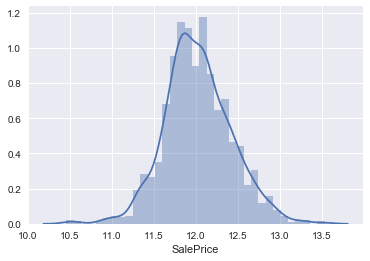

In [61]:
sns.distplot(train['SalePrice'])

In [63]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)



F:\Programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


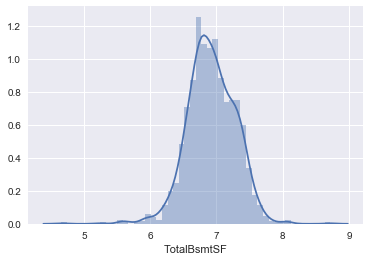

In [64]:
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'])

In [65]:
train.loc[:,('TotalBsmtSF','SalePrice')]

,TotalBsmtSF,SalePrice
0,6.752270,12.247694
1,7.140453,12.109011
2,6.824374,12.317167
3,6.628041,11.849398
4,7.043160,12.429216
5,6.679599,11.870600
6,7.430114,12.634603
7,7.009409,12.206073
8,6.858565,11.774520
9,6.898715,11.678440


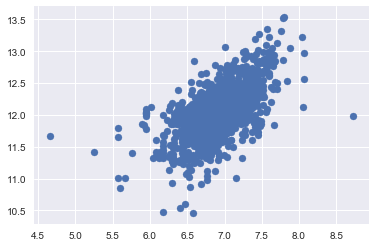

In [66]:
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice']);

In [67]:
train_dummies = pd.get_dummies(train)
clean_dataset(train_dummies)
train_dummies

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,...,0,0,0,1,0,0,0,0,1,0


In [68]:
test.loc[960, "PoolQC"] = "Fa"
test.loc[1043, "PoolQC"] = "Gd"
test.loc[1139, "PoolQC"] = "Fa"

# Garage
test.loc[666, "GarageYrBlt"] = 1979
test.loc[1116, "GarageYrBlt"] = 1979

test.loc[666, "GarageFinish"] = "Unf"
test.loc[1116, "GarageFinish"] = "Unf"

test.loc[1116, "GarageCars"] = 2
test.loc[1116, "GarageArea"] = 480

test.loc[666, "GarageQual"] = "TA"
test.loc[1116, "GarageQual"] = "TA"

test.loc[666, "GarageCond"] = "TA"
test.loc[1116, "GarageCond"] = "TA"
# PoolQC
train = train.fillna({"PoolQC": "None"})
test = test.fillna({"PoolQC": "None"})

# Alley
train = train.fillna({"Alley": "None"})
test = test.fillna({"Alley": "None"})

# FireplaceQu
train = train.fillna({"FireplaceQu": "None"})
test = test.fillna({"FireplaceQu": "None"})

# LotFrontage
train = train.fillna({"LotFrontage": 0})
test = test.fillna({"LotFrontage": 0})

# Garage
train = train.fillna({"GarageType": "None"})
test = test.fillna({"GarageType": "None"})
train = train.fillna({"GarageYrBlt": 0})
test = test.fillna({"GarageYrBlt": 0})
train = train.fillna({"GarageFinish": "None"})
test = test.fillna({"GarageFinish": "None"})
test = test.fillna({"GarageCars": 0})
test = test.fillna({"GarageArea": 0})
train = train.fillna({"GarageQual": "None"})
test = test.fillna({"GarageQual": "None"})
train = train.fillna({"GarageCond": "None"})
test = test.fillna({"GarageCond": "None"})

# Bsmt
train = train.fillna({"BsmtQual": "None"})
test = test.fillna({"BsmtQual": "None"})
train = train.fillna({"BsmtCond": "None"})
test = test.fillna({"BsmtCond": "None"})
train = train.fillna({"BsmtExposure": "None"})
test = test.fillna({"BsmtExposure": "None"})
train = train.fillna({"BsmtFinType1": "None"})
test = test.fillna({"BsmtFinType1": "None"})
train = train.fillna({"BsmtFinSF1": 0})
test = test.fillna({"BsmtFinSF1": 0})
train = train.fillna({"BsmtFinType2": "None"})
test = test.fillna({"BsmtFinType2": "None"})
test = test.fillna({"BsmtFinSF2": 0})
test = test.fillna({"BsmtUnfSF": 0})
test = test.fillna({"TotalBsmtSF": 0})
test = test.fillna({"BsmtFullBath": 0})
test = test.fillna({"BsmtHalfBath": 0})

# MasVnr
train = train.fillna({"MasVnrType": "None"})
test = test.fillna({"MasVnrType": "None"})
train = train.fillna({"MasVnrArea": 0})
test = test.fillna({"MasVnrArea": 0})

# MiscFeature,Fence,Utilities
# train = train.drop(["Fence", "MiscFeature", "Utilities"], axis=1)
# test = test.drop(["Fence", "MiscFeature", "Utilities"], axis=1)

# other
test = test.fillna({"MSZoning": "RL"})
test = test.fillna({"Exterior1st": "VinylSd"})
test = test.fillna({"Exterior2nd": "VinylSd"})
train = train.fillna({"Electrical": "SBrkr"})
test = test.fillna({"KitchenQual": "TA"})
test = test.fillna({"Functional": "Typ"})
test = test.fillna({"SaleType": "WD"})
lfmean = test['LotFrontage'].mean()
test['LotFrontage'].fillna(value = lfmean)

test_dummies = pd.get_dummies(test)
test_dummies



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
5,1466,60,75.0,10000,6,5,1993,1994,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
6,1467,20,0.0,7980,6,7,1992,2007,0.0,935.0,...,0,0,0,1,0,0,0,0,1,0
7,1468,60,63.0,8402,6,5,1998,1998,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
8,1469,20,85.0,10176,7,5,1990,1990,0.0,637.0,...,0,0,0,1,0,0,0,0,1,0
9,1470,20,70.0,8400,4,5,1970,1970,0.0,804.0,...,0,0,0,1,0,0,0,0,1,0


In [69]:
train_dummies.loc[960, "PoolQC"] = "Fa"
train_dummies.loc[1043, "PoolQC"] = "Gd"
train_dummies.loc[1139, "PoolQC"] = "Fa"
 
# Garage
train_dummies.loc[666, "GarageYrBlt"] = 1979
train_dummies.loc[1116, "GarageYrBlt"] = 1979
 
train_dummies.loc[666, "GarageFinish"] = "Unf"
train_dummies.loc[1116, "GarageFinish"] = "Unf"
 
train_dummies.loc[1116, "GarageCars"] = 2
train_dummies.loc[1116, "GarageArea"] = 480
 
train_dummies.loc[666, "GarageQual"] = "TA"
train_dummies.loc[1116, "GarageQual"] = "TA"
 
train_dummies.loc[666, "GarageCond"] = "TA"
train_dummies.loc[1116, "GarageCond"] = "TA"
# PoolQC
train = train.fillna({"PoolQC": "None"})
train_dummies = train_dummies.fillna({"PoolQC": "None"})
 
# Alley
train = train.fillna({"Alley": "None"})
train_dummies = train_dummies.fillna({"Alley": "None"})
 
# FireplaceQu
train = train.fillna({"FireplaceQu": "None"})
train_dummies = train_dummies.fillna({"FireplaceQu": "None"})
 
# LotFrontage
train = train.fillna({"LotFrontage": 0})
train_dummies = train_dummies.fillna({"LotFrontage": 0})
 
# Garage
train = train.fillna({"GarageType": "None"})
train_dummies = train_dummies.fillna({"GarageType": "None"})
train = train.fillna({"GarageYrBlt": 0})
train_dummies = train_dummies.fillna({"GarageYrBlt": 0})
train = train.fillna({"GarageFinish": "None"})
train_dummies = train_dummies.fillna({"GarageFinish": "None"})
train_dummies = train_dummies.fillna({"GarageCars": 0})
train_dummies = train_dummies.fillna({"GarageArea": 0})
train = train.fillna({"GarageQual": "None"})
train_dummies = train_dummies.fillna({"GarageQual": "None"})
train = train.fillna({"GarageCond": "None"})
train_dummies = train_dummies.fillna({"GarageCond": "None"})
 
# Bsmt
train = train.fillna({"BsmtQual": "None"})
train_dummies = train_dummies.fillna({"BsmtQual": "None"})
train = train.fillna({"BsmtCond": "None"})
train_dummies = train_dummies.fillna({"BsmtCond": "None"})
train = train.fillna({"BsmtExposure": "None"})
train_dummies = train_dummies.fillna({"BsmtExposure": "None"})
train = train.fillna({"BsmtFinType1": "None"})
train_dummies = train_dummies.fillna({"BsmtFinType1": "None"})
train = train.fillna({"BsmtFinSF1": 0})
train_dummies = train_dummies.fillna({"BsmtFinSF1": 0})
train = train.fillna({"BsmtFinType2": "None"})
train_dummies = train_dummies.fillna({"BsmtFinType2": "None"})
train_dummies = train_dummies.fillna({"BsmtFinSF2": 0})
train_dummies = train_dummies.fillna({"BsmtUnfSF": 0})
train_dummies = train_dummies.fillna({"TotalBsmtSF": 0})
train_dummies = train_dummies.fillna({"BsmtFullBath": 0})
train_dummies = train_dummies.fillna({"BsmtHalfBath": 0})
 
# MasVnr
train = train.fillna({"MasVnrType": "None"})
train_dummies = train_dummies.fillna({"MasVnrType": "None"})
train = train.fillna({"MasVnrArea": 0})
train_dummies = train_dummies.fillna({"MasVnrArea": 0})
 
# MiscFeature,Fence,Utilities
# train = train.drop(["Fence", "MiscFeature", "Utilities"], axis=1)
# train_dummies = train_dummies.drop(["Fence", "MiscFeature", "Utilities"], axis=1)
 
# other
train_dummies = train_dummies.fillna({"MSZoning": "RL"})
train_dummies = train_dummies.fillna({"Exterior1st": "VinylSd"})
train_dummies = train_dummies.fillna({"Exterior2nd": "VinylSd"})
train = train.fillna({"Electrical": "SBrkr"})
train_dummies = train_dummies.fillna({"KitchenQual": "TA"})
train_dummies = train_dummies.fillna({"Functional": "Typ"})
train_dummies = train_dummies.fillna({"SaleType": "WD"})
lfmean = train_dummies['LotFrontage'].mean()
train_dummies['LotFrontage'].fillna(value = lfmean)


dropcols = list(set(list(train_dummies.columns))-set(list(test_dummies.columns)))
dropcols.append('SalePrice')

train_notarg = train_dummies.drop(dropcols,axis = 1)
y = train_dummies['SalePrice']


In [89]:
train_notarg[train_notarg==np.inf]=np.nan
train_notarg.fillna(train_notarg.mean(), inplace=True)
train_notarg.drop([960,666,1116],inplace = True)
# train_notarg.fillna(0,inplace= True)

In [79]:
col_mask=train_notarg.isnull().any(axis=0) 
row_mask=train_notarg.isnull().any(axis=1)
row_mask

0       False
1       False
2       False
3       False
4       False
5       False
6       False
8       False
9       False
10      False
11      False
13      False
15      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
25      False
26      False
27      False
28      False
29      False
30      False
32      False
33      False
34      False
35      False
        ...  
1425    False
1426    False
1427    False
1428    False
1430    False
1432    False
1433    False
1434    False
1435    False
1436    False
1437    False
1438    False
1439    False
1440    False
1442    False
1444    False
1445    False
1447    False
1448    False
1451    False
1452    False
1454    False
1455    False
1456    False
1457    False
1458    False
1459    False
960     False
666     False
1116    False
Length: 1124, dtype: bool

In [71]:
dropcols = list(set(list(train_dummies.columns))-set(list(test_dummies.columns)))
dropcols.append('SalePrice')
dropcols.append('Id')
dropcols

['Heating_Floor',
 'Condition2_RRNn',
 'GarageQual_Ex',
 'Heating_OthW',
 'MiscFeature_TenC',
 'Condition2_RRAn',
 'Electrical_Mix',
 'PoolQC',
 'Utilities_NoSeWa',
 'Exterior1st_Stone',
 'RoofMatl_ClyTile',
 'Exterior2nd_Other',
 'Exterior1st_ImStucc',
 'GarageCond',
 'SalePrice',
 'HouseStyle_2.5Fin',
 'GarageFinish',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'GarageQual',
 'Condition2_RRAe',
 'SalePrice',
 'Id']

In [93]:
rr = Ridge(alpha=10)
rr.fit(train_notarg, y)
np.sqrt(-cross_val_score(rr, train_notarg, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.14264055982471757

In [94]:
y_pred = rr.predict(test_dummies)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.scatter(y,y_pred)

plt.plot(range(10, 15), range(10, 15), color="red")

In [ ]:
submission = np.exp(np.array((y_pred)))-1

In [92]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
8       11.774520
9       11.678440
10      11.771436
11      12.751300
13      12.540758
15      11.790557
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
32      12.100156
33      12.016726
34      12.533576
35      12.641097
          ...    
1420    12.100156
1421    11.755872
1422    11.824080
1425    11.863582
1426    12.509874
1427    11.849398
1428    11.686879
1430    12.165980
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1442    12.644328
1444    12.098487
1445    11.767568
1447    12.388394
1448    11.626254
1451    12.567551
1452    11.884489
1454    12